In [ ]:
#default_exp eda_ref

# Etude des références des amendements

In [ ]:
#hide
#!pip3 install pandas matplotlib

In [ ]:
# import sys
# !{sys.executable} -m pip install -U pandas-profiling[notebook]
# !jupyter nbextension enable --py widgetsnbextension

In [ ]:
#hide
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

In [ ]:
#hide
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
#export
def load_data(file):
    df = pd.read_csv(file)
    # All string to lowercase
    df = df.applymap(lambda s:s.lower() if type(s) == str else s)
    return df

In [ ]:
files = {
    #"references_amendements_plfss_2020-2021" : "https://github.com/leximpact/donnees-extraites-assemblee/raw/main/references_amendements_plfss_2020-2021.csv",
    #"references_amendements_affaires_sociales" : "https://github.com/leximpact/donnees-extraites-assemblee/raw/main/references_amendements_affaires_sociales.csv"
    "references_articles_amendes_plfss_2020-2021" : "https://github.com/leximpact/donnees-extraites-assemblee/raw/main/references_articles_amendes_plfss_2020-2021.csv"
}

for k in files.keys():
    print(k, files.get(k))
    df = load_data(files.get(k))
    df["law_article"] = df.law + ' article ' + df.article
    #df.law_article.value_counts().to_frame().to_csv(k + '-top-article.csv')

references_articles_amendes_plfss_2020-2021 https://github.com/leximpact/donnees-extraites-assemblee/raw/main/references_articles_amendes_plfss_2020-2021.csv


## Exploration générale des données

In [ ]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile

Summarize dataset:   0%|          | 0/34 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#export
# Plot value counts of a Pandas Series
def plot_serie(serie, title=''):
    fig, ax = plt.subplots(figsize=(15, 8))
    ax.barh(serie.value_counts().to_frame().index.tolist(),
            serie.value_counts().to_frame().iloc[:,0].tolist(), align='center')
    ax.invert_yaxis()  # labels read top-to-bottom
    ax.set_xlabel("Nombre d'occurences")
    ax.set_title(title)
    plt.show()

In [ ]:
#export
def display_distinct(df):
    columns = df.columns
    to_be_removed = []
    for column in columns:
        nb_unique_values = eval('df["' + column + '"].nunique()')
        print("Nombres de valeurs distinctes pour", column, ":", nb_unique_values)
        if nb_unique_values > 50:
            to_be_removed.append(column)
    print("\nColumn with too many distinct values :\n", to_be_removed)
    '''
    Display distinct values
    '''
    columns_redux = [item for item in columns if item not in to_be_removed ]
    for column in columns_redux:
        print("\n\nValeurs distinctes pour", column, ':')
        #eval('print(df["' + column + '"].value_counts())')
        serie = eval('df["' + column + '"]')
        print(serie.value_counts())
        plot_serie(serie, column)

Nombres de valeurs distinctes pour alinea : 34
Nombres de valeurs distinctes pour alinea1 : 6
Nombres de valeurs distinctes pour amendements1Signataire : 15
Nombres de valeurs distinctes pour amendementsMoins10Signataires : 7
Nombres de valeurs distinctes pour amendementsPlus10Signataires : 18
Nombres de valeurs distinctes pour article : 65
Nombres de valeurs distinctes pour book : 2
Nombres de valeurs distinctes pour chapter : 2
Nombres de valeurs distinctes pour code-part : 4
Nombres de valeurs distinctes pour law : 32
Nombres de valeurs distinctes pour lawType : 6
Nombres de valeurs distinctes pour paragraph : 2
Nombres de valeurs distinctes pour section : 2
Nombres de valeurs distinctes pour section1 : 1
Nombres de valeurs distinctes pour sentence : 6
Nombres de valeurs distinctes pour text : 217
Nombres de valeurs distinctes pour texteLegislatif : 2
Nombres de valeurs distinctes pour texteLegislatifArticle : 48
Nombres de valeurs distinctes pour title : 3
Nombres de valeurs distin

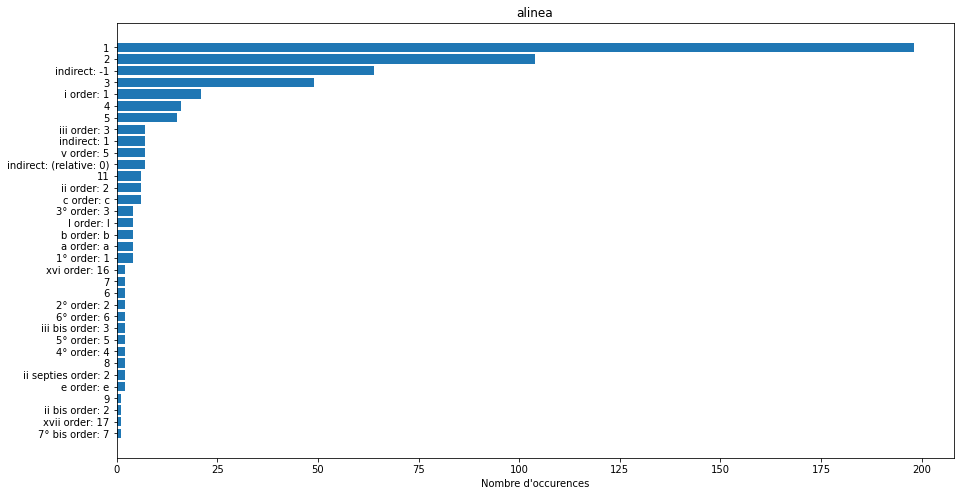



Valeurs distinctes pour alinea1 :
b order: b     4
1° order: 1    3
2° order: 2    2
c order: c     2
2              2
3° order: 3    1
Name: alinea1, dtype: int64


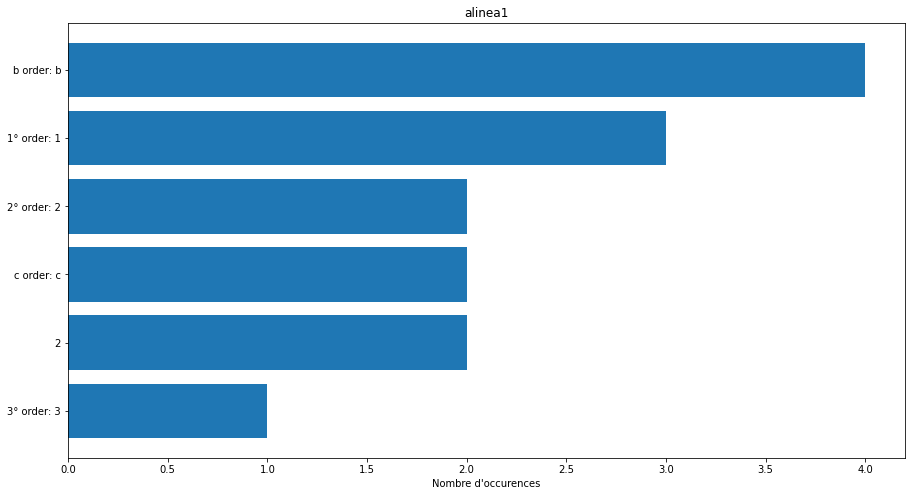



Valeurs distinctes pour amendements1Signataire :
1     432
2     184
0     175
3     171
30    141
9      78
6      66
17     51
16     50
4      49
11     38
8      23
5      22
21     13
10     11
Name: amendements1Signataire, dtype: int64


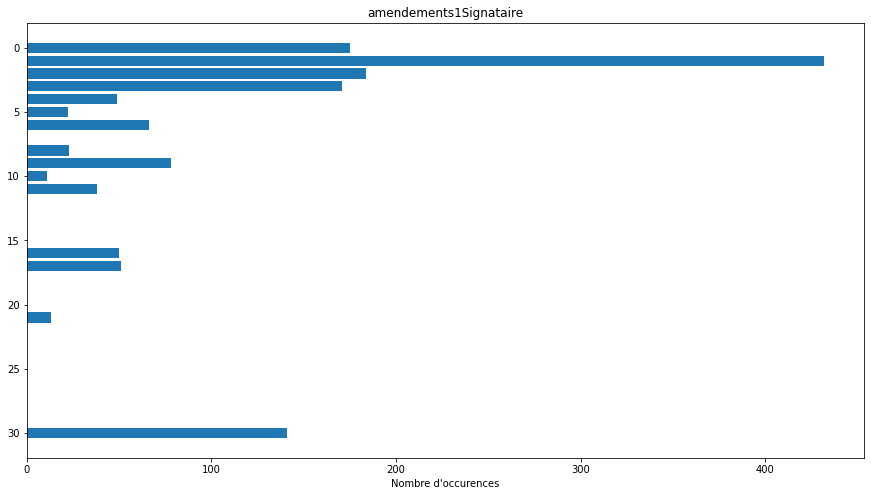



Valeurs distinctes pour amendementsMoins10Signataires :
0    1107
1     146
2      84
6      77
4      52
3      32
5       6
Name: amendementsMoins10Signataires, dtype: int64


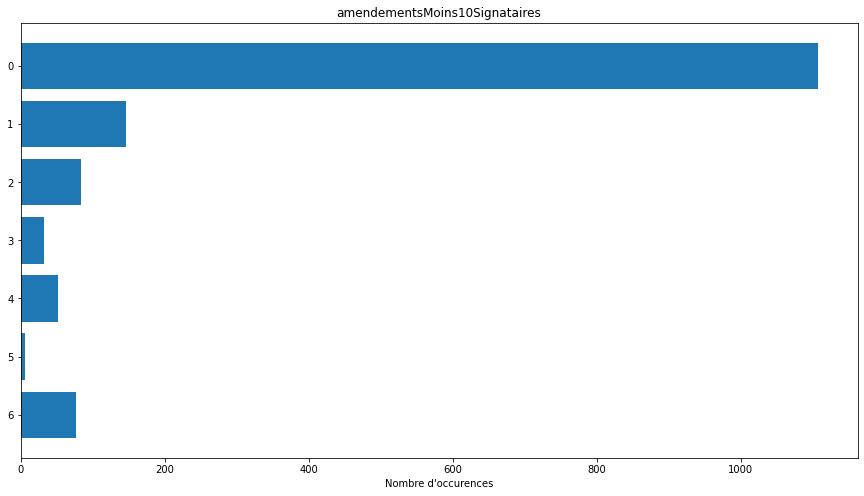



Valeurs distinctes pour amendementsPlus10Signataires :
2     398
0     282
1     234
4     139
11    131
5      56
6      54
27     51
7      34
3      31
14     25
8      18
22     14
24     13
26     13
10      6
12      3
9       2
Name: amendementsPlus10Signataires, dtype: int64


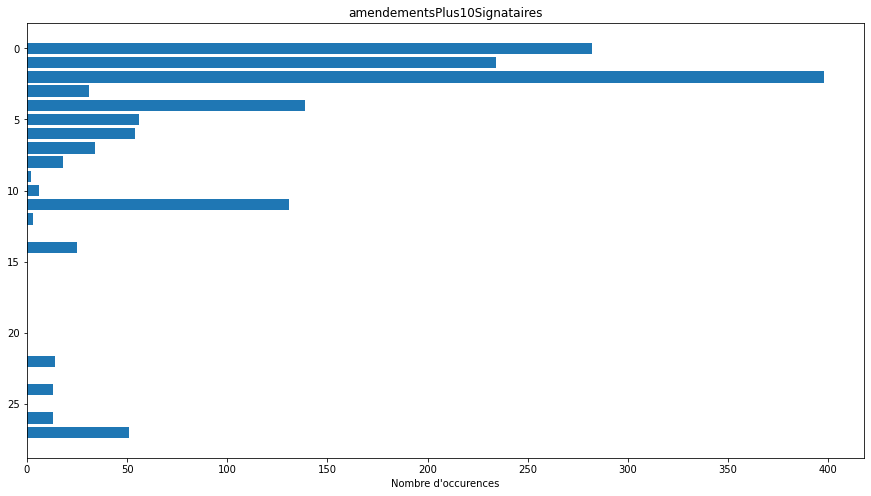



Valeurs distinctes pour book :
ier    2
ii     1
Name: book, dtype: int64


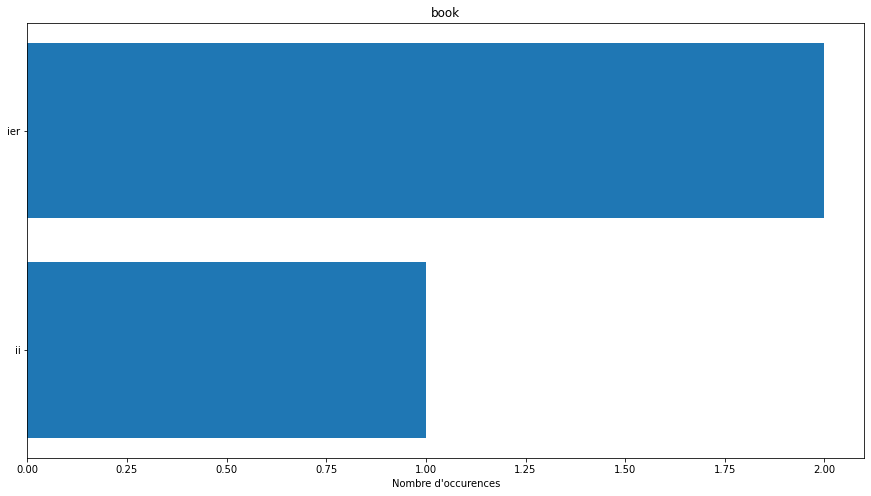



Valeurs distinctes pour chapter :
indirect: (relative: 0)    8
v                          1
Name: chapter, dtype: int64


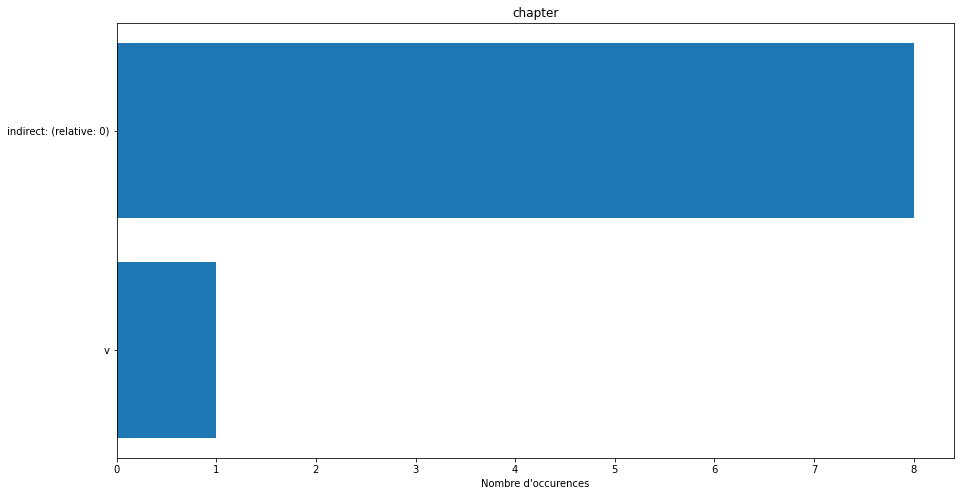



Valeurs distinctes pour code-part :
order: 5       6
indirect: 1    6
order: 3       2
order: 6       1
Name: code-part, dtype: int64


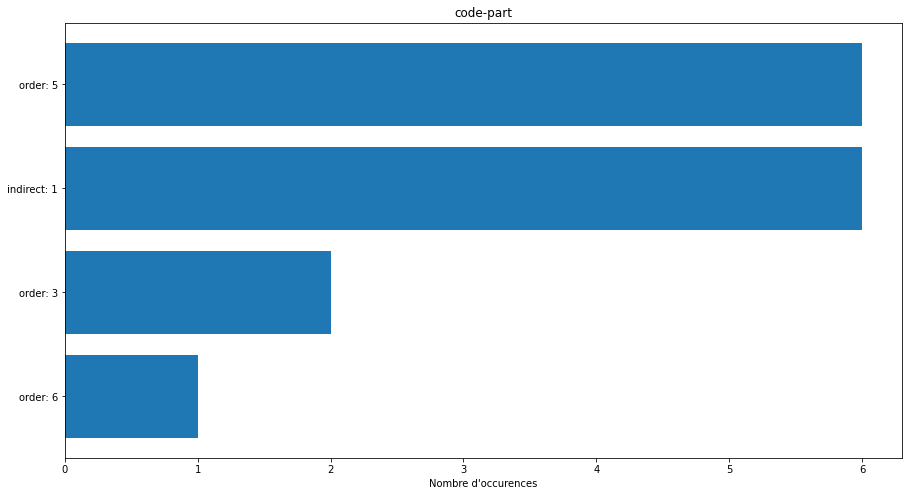



Valeurs distinctes pour law :
indirect: (relative: 0)                                                                    217
code de la sécurité sociale                                                                191
code de la santé publique                                                                   82
code rural et de la pêche maritime                                                          49
code du travail                                                                             39
code de l’action sociale et des familles                                                    29
code général des impôts                                                                     23
code civil                                                                                  12
code des transports                                                                         10
89-1009 du 1989-12-31                                                                        6
code des juridicti

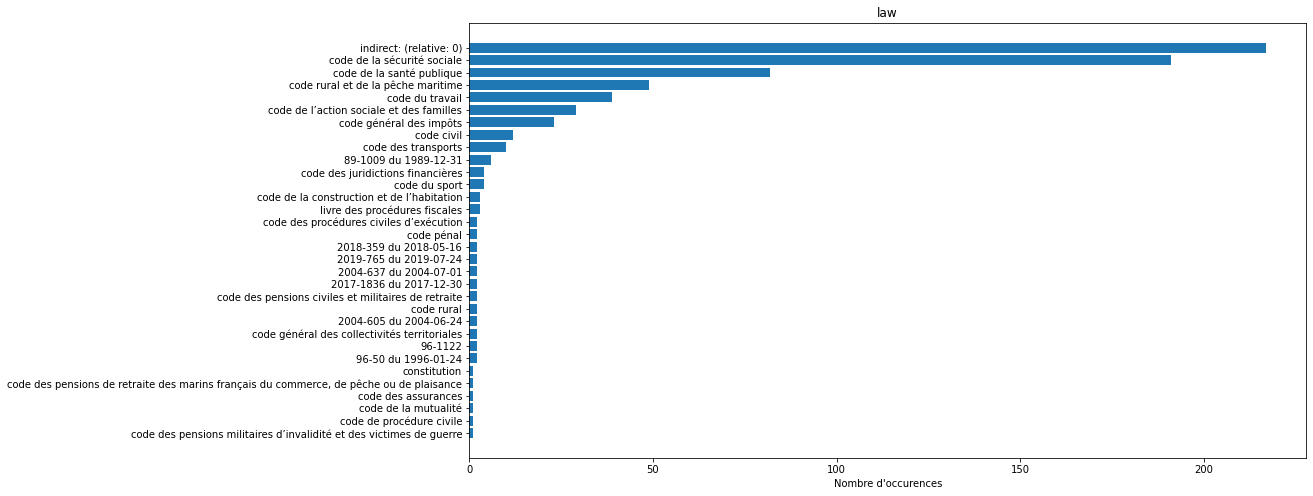



Valeurs distinctes pour lawType :
code            650
loi              37
ordonnance       12
décret            1
constitution      1
arrêté            1
Name: lawType, dtype: int64


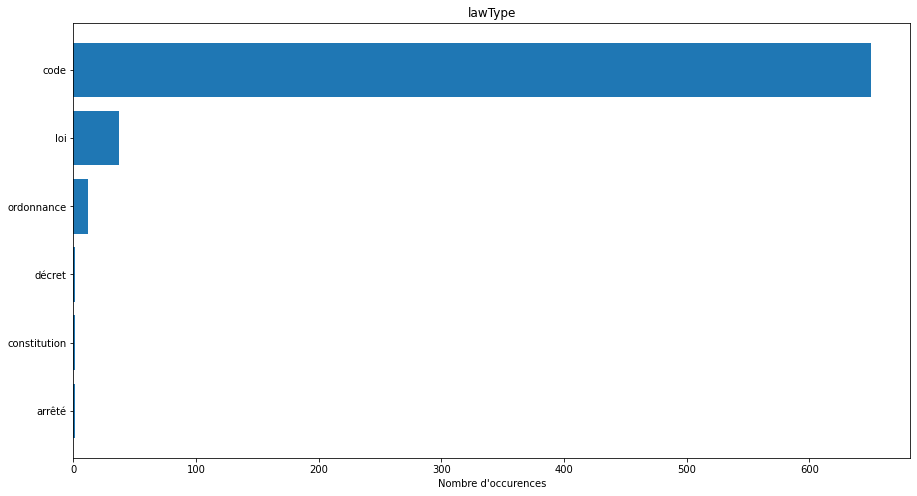



Valeurs distinctes pour paragraph :
indirect: (relative: 0)    1
2                          1
Name: paragraph, dtype: int64


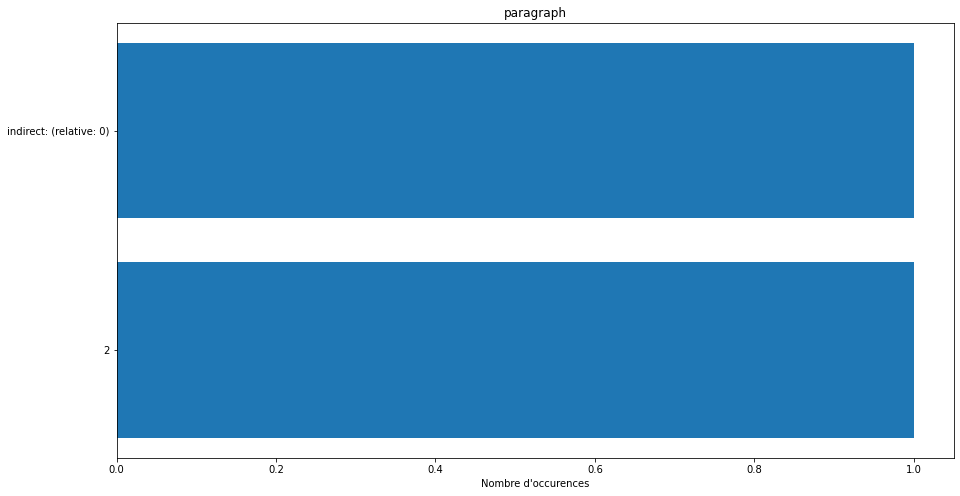



Valeurs distinctes pour section :
indirect: (relative: 0)    1
4                          1
Name: section, dtype: int64


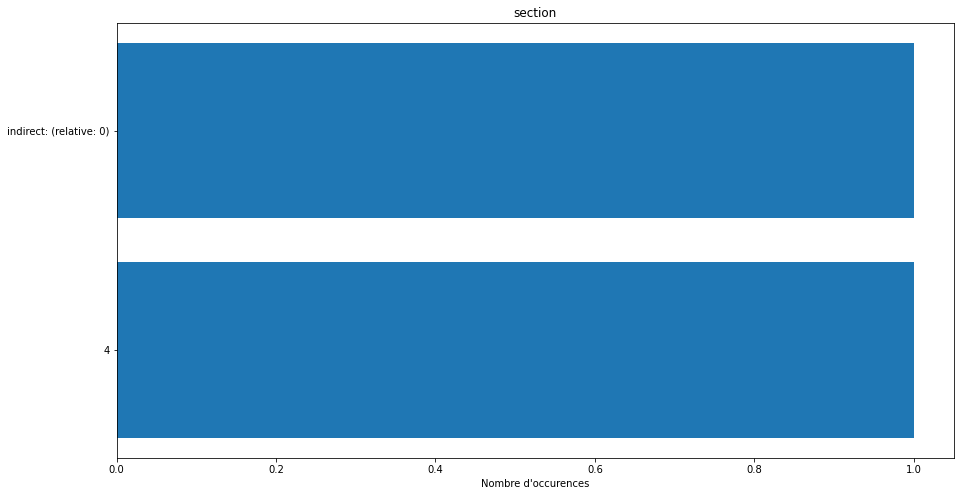



Valeurs distinctes pour section1 :
2.0    1
Name: section1, dtype: int64


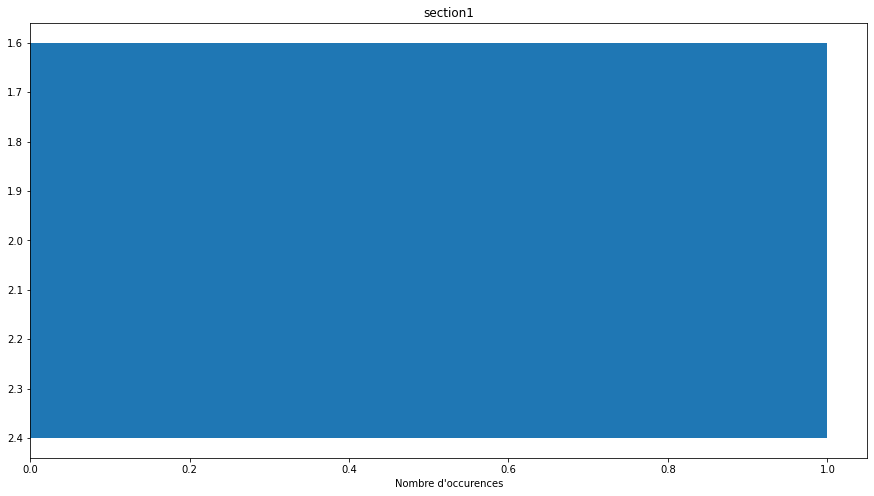



Valeurs distinctes pour sentence :
1               69
2               39
indirect: -1    13
3               11
4                2
5                1
Name: sentence, dtype: int64


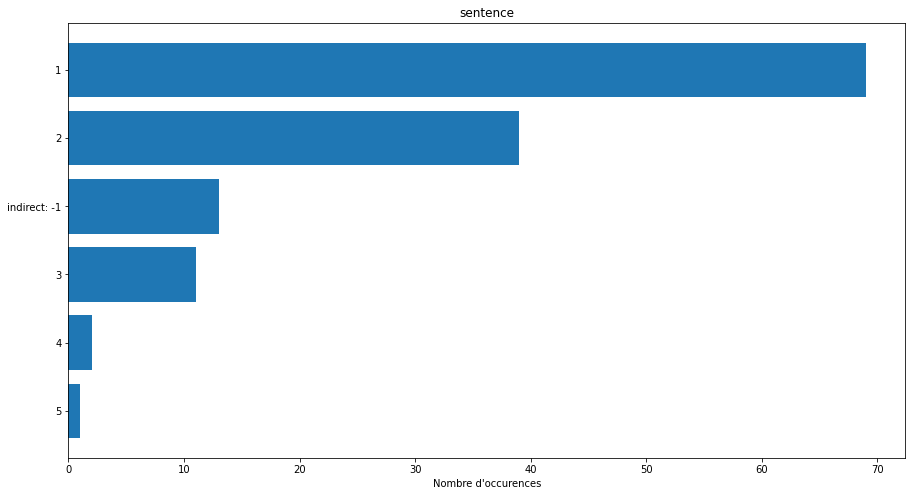



Valeurs distinctes pour texteLegislatif :
plfss pour 2020    1129
plfss pour 2021     375
Name: texteLegislatif, dtype: int64


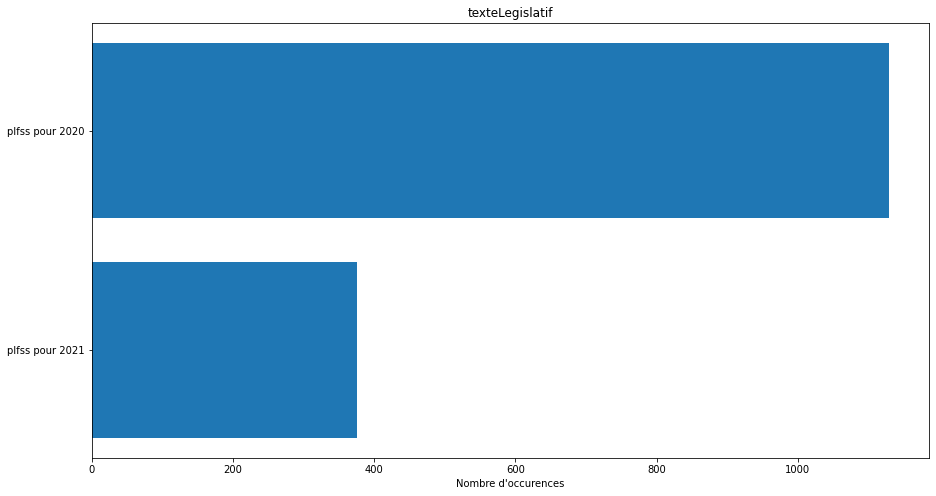



Valeurs distinctes pour texteLegislatifArticle :
article 38             144
article 45             126
article 46             108
article 17             101
article 10              84
article 32              69
article 34              56
article 16              56
article 48              56
article 7               55
article 28              50
article 42              44
article 8               43
article 3               42
article 43              36
article 36              35
article 30              32
article 53              27
article 52              26
article 15              25
article 56              24
article 12              24
article 11              24
article 40              22
article 14              20
article 55              19
article 54              19
article 26 bis          15
article 13              14
article 9               12
article 49              12
article 18              11
article 33               9
article 37               8
article 45 bis           8
arti

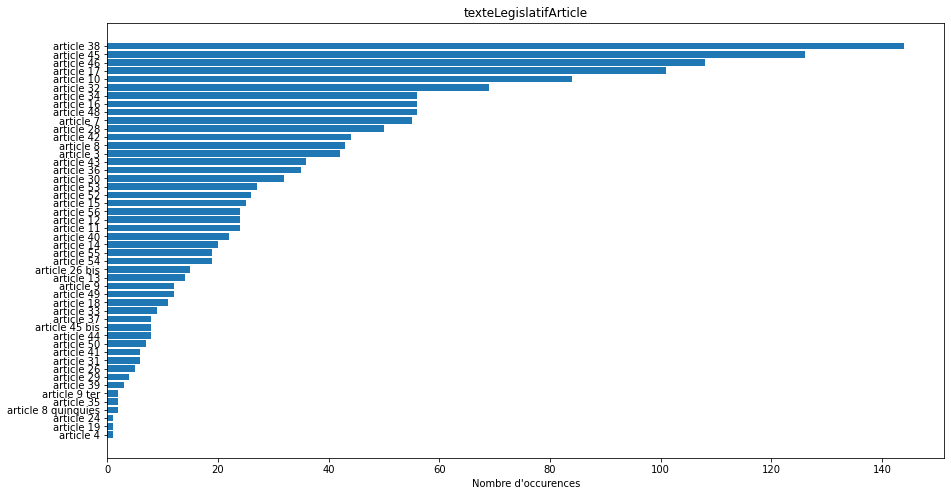



Valeurs distinctes pour title :
indirect: (relative: 0)    4
vi                         1
ii                         1
Name: title, dtype: int64


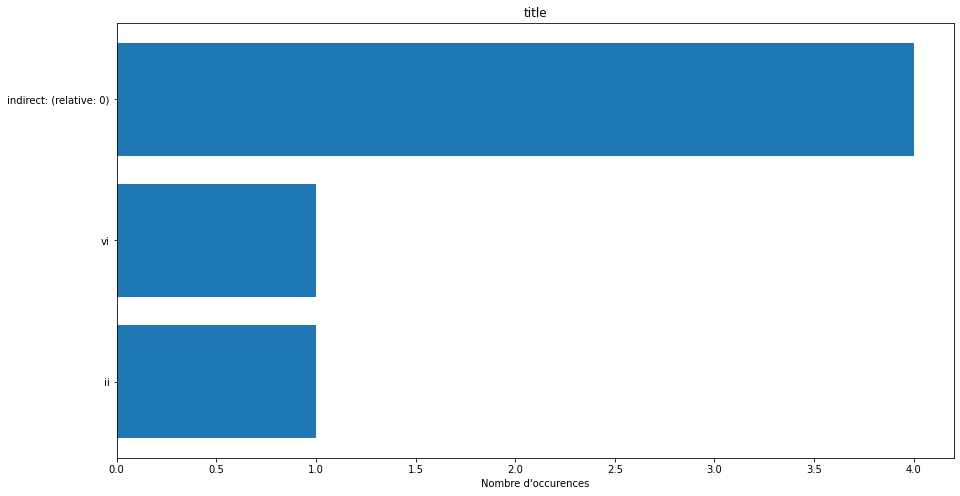



Valeurs distinctes pour year :
2019.0    768
2020.0    375
Name: year, dtype: int64


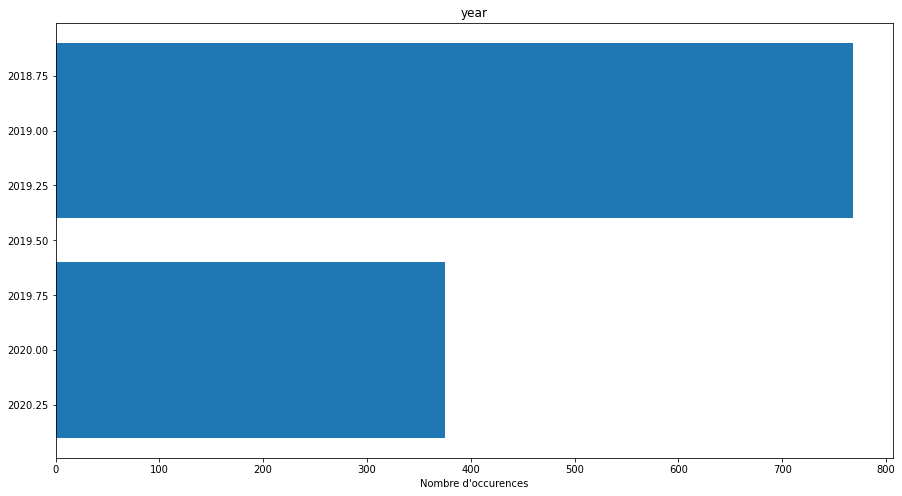



Valeurs distinctes pour law_article :
code rural et de la pêche maritime article l732-10      2
89-1009 du 1989-12-31 article 6-3                       2
code rural et de la pêche maritime article l723-13-3    2
89-1009 du 1989-12-31 article 6-1                       2
96-1122 article 20-1                                    2
code de la santé publique article l5471-1               2
2018-359 du 2018-05-16 article 4                        2
code civil article 373-2-2                              2
2017-1836 du 2017-12-30 article 15                      2
code de la sécurité sociale article l160-9              2
code de la sécurité sociale article l422-6              2
89-1009 du 1989-12-31 article 6-2                       2
indirect: (relative: 0) article l253-8-1                2
code général des impôts article 879                     2
96-50 du 1996-01-24 article 4                           2
code rural et de la pêche maritime article l732-12      2
indirect: (relative: 0) article 

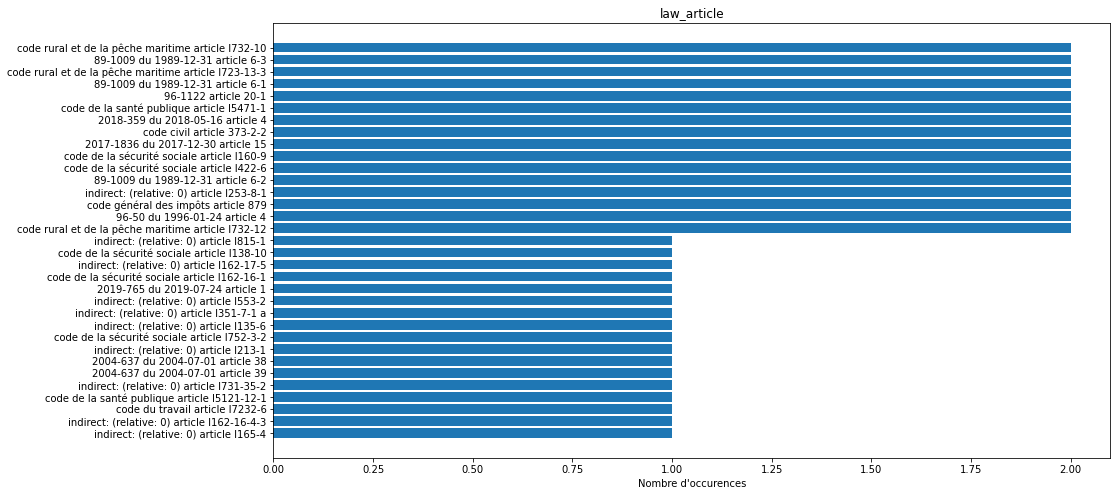

In [ ]:
display_distinct(df)

In [ ]:
df.head()

,alinea,alinea1,amendements1Signataire,amendementsMoins10Signataires,amendementsPlus10Signataires,article,book,chapter,code-part,law,...,paragraph,section,section1,sentence,text,texteLegislatif,texteLegislatifArticle,title,year,law_article
0,NaN,NaN,6,4,22,NaN,NaN,NaN,NaN,code de la sécurité sociale,...,NaN,NaN,NaN,NaN,du code de la sécurité sociale,plfss pour 2020,article 3,NaN,2019.0,NaN
1,5,NaN,6,4,22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,au cinquième alinéa,plfss pour 2020,article 3,NaN,2019.0,NaN
2,indirect: -1,NaN,6,4,22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,au dernier alinéa,plfss pour 2020,article 3,NaN,2019.0,NaN
3,e order: e,NaN,6,4,22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,au e,plfss pour 2020,article 3,NaN,2019.0,NaN
4,iii bis order: 3,NaN,6,4,22,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,du iii bis,plfss pour 2020,article 3,NaN,2019.0,NaN


## Nombre d'amendements par article, par année

In [ ]:
import numpy as np
for y in df.year.unique():
    if np.isnan(y):
        continue
    y = int(y)
    print(y)
    df_tmp = df.query("year == @y")["law_article"]
    df_tmp.value_counts().to_frame().head(5)
    df_tmp.value_counts().to_frame().to_csv(f'{k}-{y}-top-article.csv')

2019


,law_article
code civil article 373-2-2,2
code rural et de la pêche maritime article l732-10,1
code de la sécurité sociale article l162-16-1,1
code rural et de la pêche maritime article l723-13-3,1
2004-637 du 2004-07-01 article 38,1


2020


,law_article


## En fonction du nombre de soutiens

In [ ]:
df.columns

Index(['alinea', 'alinea1', 'amendements1Signataire',
       'amendementsMoins10Signataires', 'amendementsPlus10Signataires',
       'article', 'book', 'chapter', 'code-part', 'law', 'lawType',
       'paragraph', 'section', 'section1', 'sentence', 'text',
       'texteLegislatif', 'texteLegislatifArticle', 'title', 'year',
       'law_article'],
      dtype='object')

In [ ]:
df_soutiens = df.groupby(by="law_article").sum()
df_soutiens.drop(["year", "section1"], inplace=True, axis=1)
df_soutiens["amendements_Signataire_Total"] =  df_soutiens['amendements1Signataire'] \
        + df_soutiens['amendementsMoins10Signataires'] + df_soutiens['amendementsPlus10Signataires']
df_soutiens = df_soutiens.sort_values(by=['amendements_Signataire_Total', 'amendementsPlus10Signataires', 'amendementsMoins10Signataires'], ascending=False)
df_soutiens
df_soutiens.to_excel(k + '-amendements_signataires.xlsx')

,amendements1Signataire,amendementsMoins10Signataires,amendementsPlus10Signataires,amendements_Signataire_Total
law_article,,,,
2018-359 du 2018-05-16 article 4,9,4,24,37
code de la santé publique article l5471-1,11,4,15,30
2017-1836 du 2017-12-30 article 15,5,0,15,20
96-50 du 1996-01-24 article 4,5,0,15,20
code général des impôts article 879,5,0,15,20
code de la sécurité sociale article l422-6,9,1,9,19
89-1009 du 1989-12-31 article 6-1,4,3,8,15
89-1009 du 1989-12-31 article 6-2,4,3,8,15
89-1009 du 1989-12-31 article 6-3,4,3,8,15


## TODO

- Adoptés par parti
- Article par année
- Adoptés par article
- Il nous faut également analyser les articles de lois “modifiés” par le PLFSS. Sous deux dimensions : identifier les articles du PLFSS les plus amendés. Pour chaque article, donner le nombre d’amendements, en précisant le pourcentage d’amendements de plus de 10 signatures, et le pourcentage d’amendement d’une seule signature. (Ces deux scores venant potentiellement surclasser ou déclasser l’article en termes d’importance).
- Sortir les la liste des textes de lois modifiés par l’article du PLFSS
